### AUTHOR : VAISHNAV KRISHNA P
#### INTERNSHIP: INTERN PE
* TASK: Task : Make a CAR PRICE Predictor with ML
* After that make a separate Video on it and post On LinkedIn.And Tag Internpe
* This Below Video is for your reference only.
* You can show your skills style in your own way DeadLine is End of this week  

In [211]:
# Loading the necessory dependednies 
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# ignoring the warnings 
import warnings
warnings.filterwarnings(action="ignore")

# for checking the skewness and kurtosis 
from scipy.stats import skew,kurtosis

# Print options setting
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

# label encoder for feature encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,Normalizer,MinMaxScaler

# for splitting
from sklearn.model_selection import train_test_split,KFold,cross_val_score

# Training model 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# for evaluation of the model
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [212]:
# Loading the dataset 
df = pd.read_csv("quikr_car.csv")
data = df.copy()

In [213]:
# First 5 records 
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [214]:
# Shape of the dataset 
df.shape

(892, 6)

In [215]:
# Information reageding the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


* All the records are in the form of Object 
* Consists of 5 features and 892 recods 

### EDA 
1. Misssing Value analysis 
2. Continous and Categorial feature 
3. Feature Distribution
4. Corelation analysis 
5. Outlier Analysis 
6. Data Visualisation
7. Data Cleaning
8. SKEWNESS AND KURTOSIS OF EACH CONTINOUS FEATURE

### MISSING VALUE ANALYSIS 

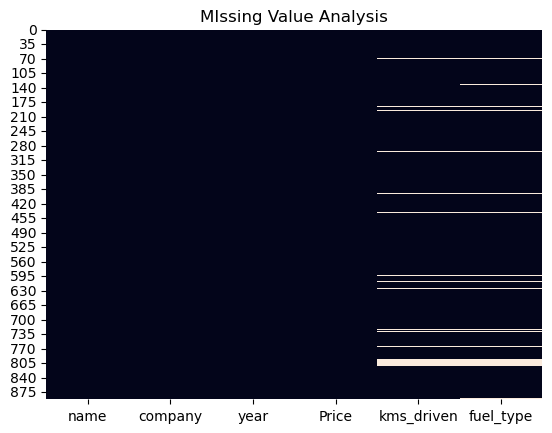

In [216]:
# Missing Value analysis using heat map 
plt.title("MIssing Value Analysis")
sns.heatmap(df.isnull(),cbar=False)
plt.show()

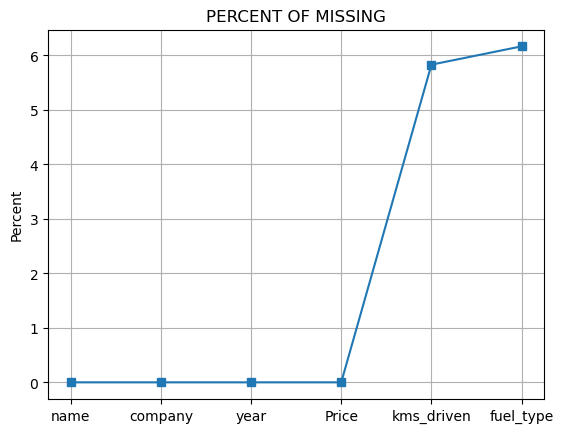

In [217]:
# Missing value percent using lineplot 
(100 * df.isnull().sum()/len(df)).plot(marker="s",grid=True)
plt.title("PERCENT OF MISSING")
plt.ylabel("Percent")
plt.show()

In [218]:
df.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

* kms driven have 52 missing value and fuel type has 55 missing value.rest features are clean. Missing value handling will take care in later on stage 

#### NO OF UNIQUE VALUES IN EACH FEATURE

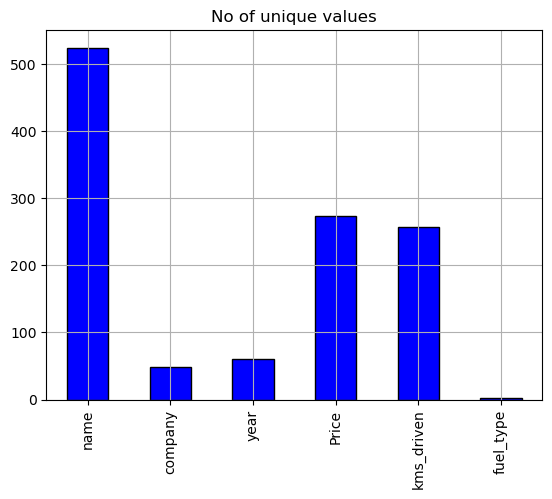

In [219]:
df.nunique().plot(kind="bar",color="b",edgecolor="k",title="No of unique values",grid=True)
plt.show()

In [220]:
df.nunique()

name          525
company        48
year           61
Price         274
kms_driven    258
fuel_type       3
dtype: int64

### CATEGORICAL AND NUMERICAL FEATURES

In [221]:
# Splitting categorical and continous features 
categorical_features = []
continous_features = []

for feature in df.columns:
    if df[feature].nunique() > 70:
        continous_features.append(feature)
    else:
        categorical_features.append(feature)

In [222]:
# Printing the information
print("CATEGORICAL FEATURES ARE : ",categorical_features)
print("CONTINOUS FEATURES ARE: ",continous_features)
print("NO OF CATEGORICAL FEATURES: ",len(categorical_features))
print("NO OF CONTINOUS FEATURES: ",len(continous_features))

CATEGORICAL FEATURES ARE :  ['company', 'year', 'fuel_type']
CONTINOUS FEATURES ARE:  ['name', 'Price', 'kms_driven']
NO OF CATEGORICAL FEATURES:  3
NO OF CONTINOUS FEATURES:  3


In [223]:
# Value counts of fuel type 
df["fuel_type"].value_counts()

Petrol    440
Diesel    395
LPG         2
Name: fuel_type, dtype: int64

### DATA CLEANING

#### CLEANING OF PRICE FEATURE

In [224]:
# removal of commas from the price feature 
df["Price"] = df["Price"].str.replace(",","")

In [225]:
# Replacing the Ask for price value of the target feature with the median value 
df["Price"][df["Price"] == "Ask For Price"] = df["Price"][df["Price"] != "Ask For Price"].astype("float").median()

In [226]:
df["Price"] = df["Price"].astype("float")

In [227]:
df["Price"].dtype

dtype('float64')

* So, the price feature is now cleaned 

#### CLEANING KMS DRIVEN FEATURE

In [228]:
# removing the kms,comma,and noise from the value 
df["kms_driven"] = df["kms_driven"].str.replace("kms","")
df["kms_driven"] = df["kms_driven"].str.replace(",","")
df["kms_driven"] = df["kms_driven"].str.replace("Petrol","45000")

In [229]:
# casting into float datatype
df["kms_driven"] = df["kms_driven"].astype("float64")

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        892 non-null    object 
 1   company     892 non-null    object 
 2   year        892 non-null    object 
 3   Price       892 non-null    float64
 4   kms_driven  840 non-null    float64
 5   fuel_type   837 non-null    object 
dtypes: float64(2), object(4)
memory usage: 41.9+ KB


In [231]:
# Handling the missing values
df["kms_driven"].fillna(df["kms_driven"].median(),inplace=True)

In [232]:
df["kms_driven"].isnull().sum()

0

In [233]:
df["kms_driven"].dtype

dtype('float64')

* So, the kms_driven column is now cleaned 

#### CLEANING THE FUEL TYPE FEATURE

In [234]:
df["fuel_type"].value_counts()

Petrol    440
Diesel    395
LPG         2
Name: fuel_type, dtype: int64

In [235]:
# Handling the missing value by adding gloabl constant for fuel type 
df["fuel_type"].fillna("Unknown",inplace=True)

* So, Now dataset is cleaned 

In [236]:
# Noises in the year feature 
noise_year = list(df["year"].value_counts().index[20:])

* List of noises in the year feature 
* since the most frequent year is 2014 lets replace with 2014

#### CLEANING THE YEAR FEATURE

In [237]:
# Removing the noises
for i in range(len(df)):
    if df["year"].iloc[i] in noise_year:
        df["year"].iloc[i] = "2014"

In [238]:
df["year"].value_counts()

2014    146
2015    117
2013     94
2016     76
2012     75
2011     60
2009     56
2017     56
2010     44
2018     34
2006     22
2019     22
2007     19
2008     16
2005     13
2003     13
2004     12
2000      7
2002      5
2001      5
Name: year, dtype: int64

In [239]:
# Type casting to int 
df["year"] = df["year"].astype(int)

* Age feature all the noises are cleared 

#### CLEANING THE COMPANY FEATURE

In [240]:
df['company'].value_counts()

Maruti        235
Hyundai       145
Mahindra      100
Tata           74
Honda          61
Toyota         39
Chevrolet      35
Renault        34
Ford           31
Volkswagen     20
Skoda          13
Audi           11
Datsun          8
Mini            8
BMW             8
Nissan          6
Commercial      6
Mercedes        6
Mitsubishi      6
Force           4
Fiat            4
tata            3
Hindustan       3
I               3
MARUTI          2
urgent          2
Used            2
Jaguar          2
Sale            2
Well            1
Any             1
TATA            1
sell            1
scratch         1
9               1
7               1
all             1
Land            1
2012            1
i               1
Volvo           1
very            1
Jeep            1
Swift           1
URJENT          1
selling         1
Yamaha          1
Tara            1
Name: company, dtype: int64

In [241]:
# Noises in the company feature 
noise_company = ["urgent","Used",'Well','Any','sell','Sale','Well','scratch',"very",'9','7','all','2012','i','I','swift','URJENT','selling']

In [242]:
# Removing the noises 
for i in range(len(df)):
    if df["company"].iloc[i] in noise_company:
        df["company"].iloc[i] = "Noise"

In [243]:
# Since the Maruti and MARUTTI is same lets make it unique 
df["company"][df["company"] == "MARUTI"] = "Maruti"

In [244]:
df["company"].nunique()

32

* So, company feature has be cleaned 

### DISTRIBUTION OF THE DATASET FEATURES USING VISUALISATION

#### BAR PLOT FOR CATEGORICAL FEATURES

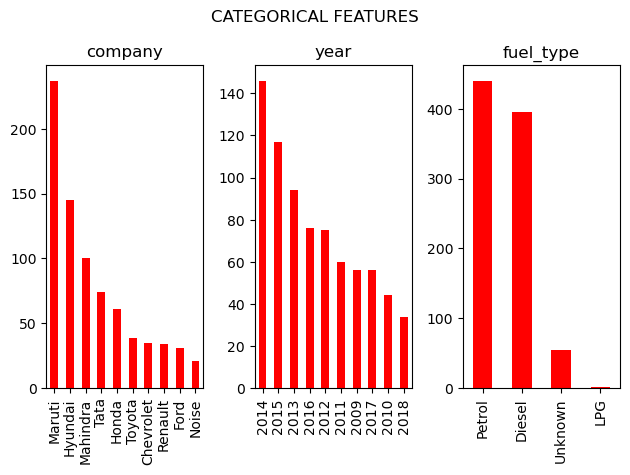

In [245]:
# BAR plot 
plt.suptitle("CATEGORICAL FEATURES")
c = 1

for feature in categorical_features:
    plt.subplot(1,3,c)
    c += 1
    df[feature].value_counts()[:10].plot(kind="bar",color="r",title=f"{feature}")
    plt.xticks(rotation=90)
plt.tight_layout()  
plt.show()

#### Scatter plot for price and kilometer driven

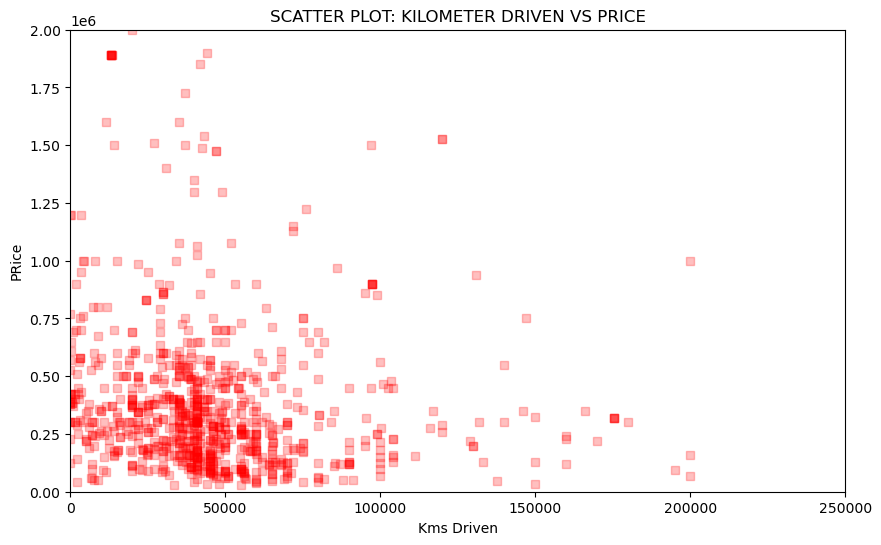

In [246]:
# Scatter plot for price and kilometer driven 
plt.figure(figsize=(10,6))
plt.scatter(x="kms_driven",y="Price",data=df,marker="s",color="r",alpha=0.25)
plt.ylim(0,2e6)
plt.title("SCATTER PLOT: KILOMETER DRIVEN VS PRICE")
plt.xlabel("Kms Driven")
plt.ylabel("PRice")
plt.xlim(0,250000)
plt.show()

In [247]:
df["Price"].corr(df["kms_driven"])

-0.11379302549418946

* From scatter plot it is understandable that if the kilometer of driven is less then the price is more 

#### Price vs company boxplot

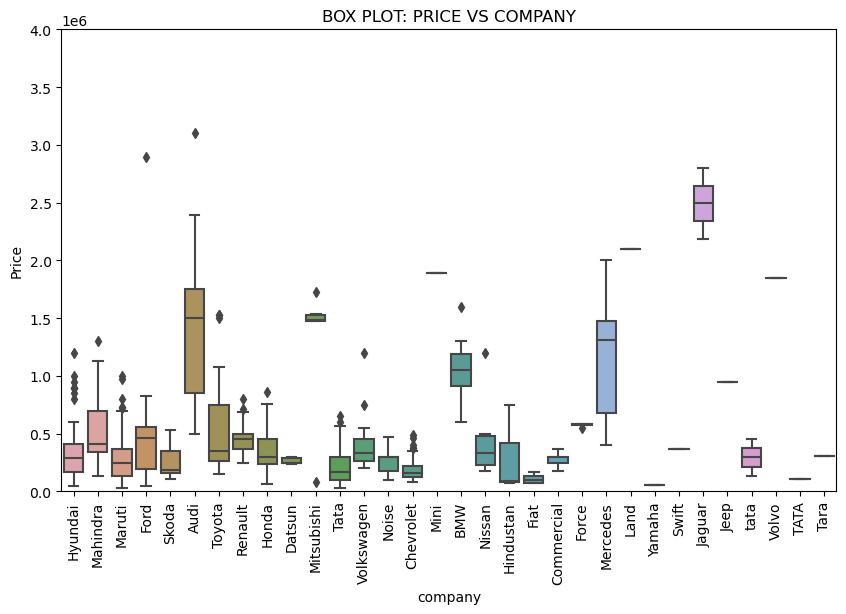

In [248]:
# Price vs company boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x="company",y="Price",data=df,saturation=0.50)
plt.title("BOX PLOT: PRICE VS COMPANY")
plt.xticks(rotation=90)
plt.ylim(0e6,4e6)
plt.show()

* There are some comapnies there vehicles are very expensive 

#### HISTOGRAM OF CONTINOUS FEATURES

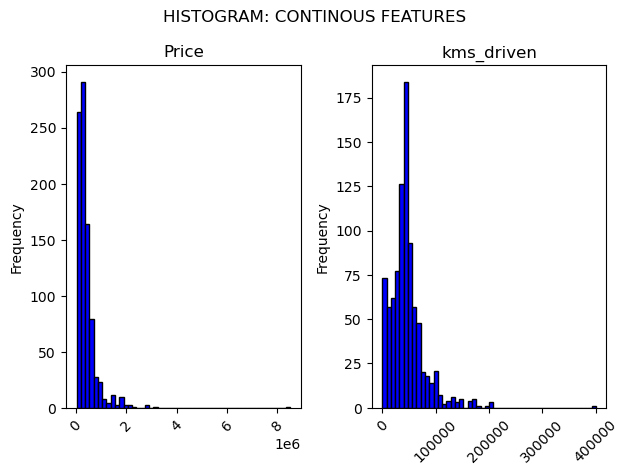

In [249]:
# Histogram of continous features
plt.suptitle("HISTOGRAM: CONTINOUS FEATURES")
c = 1
for feature in ["Price","kms_driven"]:
    plt.subplot(1,2,c)
    c += 1
    df[feature].plot(kind="hist",bins=50,color="b",edgecolor="k",title=f"{feature}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* Most of the Vehicles have the price ranges from 0-1L

#### SKEWNESS AND KURTOSIS OF CONTINOUS FEATURE

In [250]:
# checking the skwness and Kurtosis
for feature in continous_features:
    if feature not in ["name"]:
        print(f"{feature} -> skewness {skew(df[feature])} -> kurtosis: {kurtosis(df[feature])}")

Price -> skewness 7.800258674926247 -> kurtosis: 114.49843892987421
kms_driven -> skewness 2.723652360025762 -> kurtosis: 17.13793685233927


* so, the feature is positively skewed we have to apply some powerful transformation techniques for reducing the skewness

#### VIOLIN PLOT : FUEL TYPE VS PRICE



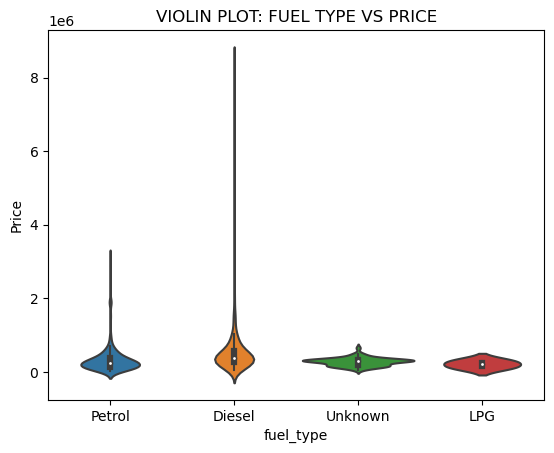

In [251]:
sns.violinplot(x="fuel_type",y="Price",data=df,width=0.9)
plt.title("VIOLIN PLOT: FUEL TYPE VS PRICE")
plt.show()

In [252]:
df["fuel_type"][df["company"] == "Audi"].value_counts()

Diesel    7
Petrol    4
Name: fuel_type, dtype: int64

In [253]:
df["fuel_type"][df["company"] == "BMW"].value_counts()

Diesel    5
Petrol    3
Name: fuel_type, dtype: int64

* from the violin plot we understood,Diesel vehicles have high price as compared to petrol.May be most of the expensive vehicles are diesel

#### LINE PLOT: YEAR OF MGF VS PRICE

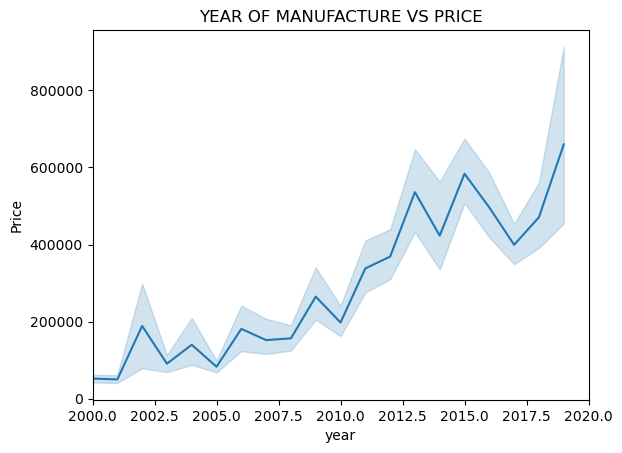

In [254]:
plt.title("YEAR OF MANUFACTURE VS PRICE")
sns.lineplot(x="year",y="Price",data=df)
plt.xlim(2000,2020)
plt.show()

In [255]:
df["year"].corr(df["Price"])

0.27432733667956716

* New vehicles have more higher cost 

### FEATURE ENGINEERING
1. Removal of constant feature
2. Creating new Features
3. Feature transformation
4. Data Reduction
5. Feature scaling

#### CREATING SOME MENINGFUL FEATURES

In [256]:
# Creating a binary column for petrol and diesel
df["Petrol"] = [0] * len(df)
df["Diesel"] = [0] * len(df)

for i in range(len(df)):
    if df["fuel_type"].iloc[i] == "Petrol":
        df["Petrol"].iloc[i] = 1
    elif df["fuel_type"].iloc[i] == "Diesel":
        df["Diesel"].iloc[i] = 1

In [257]:
# creating the age of the vehicle using the manufacturing data 
df["Age"] = 2019 - df["year"]

In [258]:
# binary feature whether the vehicle is driven less than 20000 or not 
df["less_driven"] = [0] * len(df)

for i in range(len(df)):
    if df["kms_driven"].iloc[i] <= 20000:
        df["less_driven"].iloc[i] = 1

In [259]:
df["less_driven"].value_counts()

0    726
1    166
Name: less_driven, dtype: int64

In [260]:
# Creating a feature(binary) for whether the brand is laxuary or not 
laxuary_car_company = ["Mercedes","BMW","Mini","Audi","Jaguar","Mitsubishi","Volvo"]
df["Laxuary company"] = [0] * len(df)

for i in range(len(df)):
    if df["company"].iloc[i] in laxuary_car_company:
         df["Laxuary company"].iloc[i] = 1

In [261]:
df["New Car"] = [0] *len(df)

for i in range(len(df)):
    if df["Age"].iloc[i] <= 6:
        df["New Car"].iloc[i] = 1

* Now the data is preprocessed ready for training

#### CORELATION MATRIX

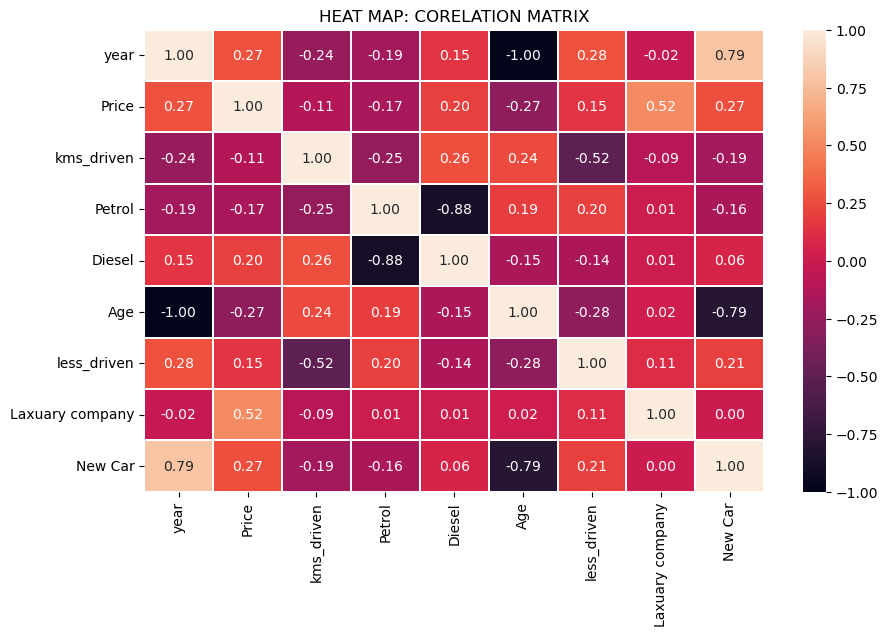

In [262]:
# Corelation Matrix
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cbar=True,linewidth=0.3,fmt="0.2f")
plt.title("HEAT MAP: CORELATION MATRIX")
plt.show()

* Multicolinear features are diesel and petrol,Age and Year

In [263]:
# Removing the outlier 
df = df[df["Price"] < 6000000]

In [264]:
df["name"].head()

0      Hyundai Santro Xing XO eRLX Euro III
1                   Mahindra Jeep CL550 MDI
2                Maruti Suzuki Alto 800 Vxi
3    Hyundai Grand i10 Magna 1.2 Kappa VTVT
4          Ford EcoSport Titanium 1.5L TDCi
Name: name, dtype: object

In [265]:
df["name"] = df["name"].str.split().str.slice(0,3).str.join(" ")

In [266]:
df["name"].nunique()

303

#### DATA TRANSFOMATION

In [267]:
# Encoding name,company_name,fuel_type using the dictionary 
dict_name = dict()
i = 1
for uni_value in df["name"].unique():
    dict_name[uni_value] = i
    i += 1

dict_company = dict()
i = 1
for uni_value in df["company"].unique():
    dict_company[uni_value] = i
    i += 1

dict_fueltype = dict()
i = 1
for uni_value in df["fuel_type"].unique():
    dict_fueltype[uni_value] = i
    i += 1

In [268]:
# Encoding the categorical features 
df["company"] = df["company"].map(dict_company)
df["name"] = df["name"].map(dict_name)
df["fuel_type"] = df["fuel_type"].map(dict_fueltype)

In [270]:
df.drop(columns=["Age","Petrol","fuel_type","less_driven"],inplace=True)

#### TRAINING OF THE MODEL

In [271]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

X = df.drop(columns=["Price"])
y = df["Price"]

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=540)

# Define the degree of polynomial you want to use
degree = 2  # You can adjust this as needed

# Creating a pipeline for polynomial regression
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Training the polynomial regression model
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model using R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

R^2 Score: 0.7462662488200509


#### PREDICTION SYSTEM

In [284]:
name = input("NAME OF CAR: ")
company = input("COMPANY NAME: ")
kms_driven = int(input("KMS DRIVEN: "))
year = int(input("YEAR: "))
fuel_type = input("FUEL TYPE: ")
diesel_binary = 0
laxuary_company = 0
new_car = 0
name_encoded = dict_name[name]
company_encoded = dict_company[company]

if fuel_type == "Diesel":
    diesel_binary = 1
if company in laxuary_car_company:
    laxuary_company = 1
if kms_driven <= 20000:
    new_car = 1
    
#prediction based on the value 
predicted_value = model.predict([[name_encoded,company_encoded,year,kms_driven,diesel_binary,laxuary_company,new_car]])
    
print("Model Predicted Value: ",predicted_value)

NAME OF CAR: Mercedes Benz GLA
COMPANY NAME: Mercedes
KMS DRIVEN: 20000
YEAR: 2015
FUEL TYPE: Diesel
Model Predicted Value:  [1845695.2471447]


- Actual price was 20,00,000 so , our model is working well 